In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [2]:
#features
train_df = pd.read_csv('data/train_features.csv')
test_df = pd.read_csv('data/test_data.csv')

In [3]:
train_df.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
train_df.columns = ['ID', 'mon_since_last', 'num_donations', 'tot_vol', 'mon_since_first', 'donated']

In [5]:
train_df.head()

,ID,mon_since_last,num_donations,tot_vol,mon_since_first,donated
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
#target
target = train_df['donated']

In [7]:
train_df.drop('ID', axis=1, inplace=True)

In [8]:
train_df.head()

,mon_since_last,num_donations,tot_vol,mon_since_first,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [9]:
test_df.columns = ['ID', 'mon_since_last', 'num_donations', 'tot_vol', 'mon_since_first']

In [10]:
ids = test_df['ID']
test_df.drop('ID', axis=1, inplace=True)

In [11]:
test_df.head()

,mon_since_last,num_donations,tot_vol,mon_since_first
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [12]:
len(ids)

200

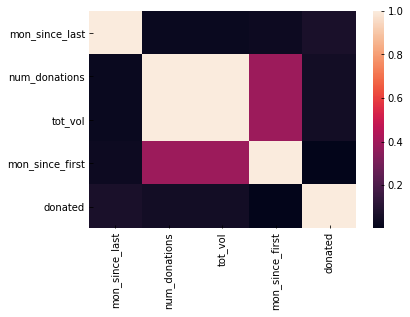

In [13]:
sns.heatmap(train_df.corr()**2)

In [14]:
train_df.drop('tot_vol', axis=1, inplace=True)
test_df.drop('tot_vol', axis=1, inplace=True)

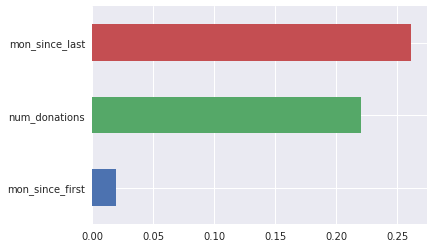

In [16]:
sns.set(font_scale = 1)
(abs(train_df.corr())
 .donated
 .drop('donated')
 .sort_values()
 .plot
 .barh())

In [33]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [35]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=test_size, random_state=seed)

In [36]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
# make predictions for test data
y_pred = model.predict_proba(test_df)
pred=[]
for i in y_pred:
    pred.append(i[0])
pred

[0.5991744,
 0.6267588,
 0.8364774,
 0.69114876,
 0.37504482,
 0.19584405,
 0.73874867,
 0.96032906,
 0.96556956,
 0.99501175,
 0.7833152,
 0.96785104,
 0.7038095,
 0.8364774,
 0.73009896,
 0.8373921,
 0.77640164,
 0.10711473,
 0.7935166,
 0.76240313,
 0.2525702,
 0.49678504,
 0.45231563,
 0.8364774,
 0.80835223,
 0.48545146,
 0.6160841,
 0.96032906,
 0.69242674,
 0.5991744,
 0.53705597,
 0.8729808,
 0.800521,
 0.70841396,
 0.8615718,
 0.6478833,
 0.84798807,
 0.96032906,
 0.5118911,
 0.8364774,
 0.6199169,
 0.9170016,
 0.9805985,
 0.61416787,
 0.9441735,
 0.800521,
 0.46454895,
 0.9441735,
 0.96032906,
 0.90718037,
 0.26035666,
 0.34353334,
 0.9180234,
 0.49678504,
 0.9165415,
 0.8083575,
 0.8442588,
 0.29397452,
 0.7543524,
 0.66029114,
 0.8364774,
 0.9020444,
 0.6530843,
 0.3730741,
 0.9020444,
 0.9658686,
 0.99241215,
 0.8178551,
 0.6959973,
 0.8364774,
 0.7809204,
 0.9180234,
 0.9110218,
 0.8364774,
 0.96253717,
 0.96785104,
 0.9373478,
 0.60614073,
 0.91508496,
 0.29397452,
 0.91

In [42]:
ll = log_loss(y_test, model.predict_proba(X_test))
print("Log Loss: %.4f" % ll)

Log Loss: 0.4896


In [48]:
submission = pd.DataFrame({'': ids, 'Made Donation in March 2007':pred})
submission.to_csv('submission_XGBClassifier.csv', index=False)

In [49]:
import xgboost as xgb

In [53]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb.predict(tesdmat)
print len(y_pred)
ll = log_loss(y_test, y_pred)
print("Log Loss: %.4f" % ll)

191
Log Loss: 0.5073


In [56]:
tesdmat_test=xgb.DMatrix(test_df)
pred=final_gb.predict(tesdmat_test)
print len(pred)

200


In [57]:
submission = pd.DataFrame({'': ids, 'Made Donation in March 2007':pred})
submission.to_csv('submission_XGBoostRegression.csv', index=False)